# U-loop: power prediction using ML

## Loading necessary packages

In [27]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime, timedelta
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

## Loading the dataset

In [28]:
df = pd.read_excel("U_loop.xlsx")

In [29]:
df

,Configuration,AR = L/W [-],SR = B/W [-],Re [-],kgr [W/(m.K)],L [m],B [m],A=L.B [m2],Ltube [m],Ltube/L [-],...,Tout [°C],ΔTout-in [°C],Power [W],Power [W/m2],Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,1.0,25.0,1.0,6000.0,1.5,25.0,1.0,25.0,49.72,1.988800,...,3.2200,1.2200,817.11,32.684400,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,25.0,1.0,6000.0,2.5,25.0,1.0,25.0,49.72,1.988800,...,3.4400,1.4400,959.07,38.362800,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,25.0,1.0,6000.0,3.5,25.0,1.0,25.0,49.72,1.988800,...,3.5800,1.5800,1052.70,42.108000,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,25.0,1.0,9000.0,1.5,25.0,1.0,25.0,49.72,1.988800,...,2.8300,0.8300,834.36,33.374400,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,25.0,1.0,9000.0,2.5,25.0,1.0,25.0,49.72,1.988800,...,2.9800,0.9800,982.95,39.318000,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,78.0,75.0,4.0,9000.0,3.5,75.0,4.0,300.0,152.72,2.036267,...,6.4499,4.4499,4251.60,14.172000,NaN,NaN,NaN,NaN,NaN,NaN
78,79.0,75.0,4.0,12000.0,1.5,75.0,4.0,300.0,152.72,2.036267,...,4.7936,2.7936,3644.80,12.149333,NaN,NaN,NaN,NaN,NaN,NaN
79,80.0,75.0,4.0,12000.0,2.5,75.0,4.0,300.0,152.72,2.036267,...,5.1890,3.1890,4136.70,13.789000,NaN,NaN,NaN,NaN,NaN,NaN
80,81.0,75.0,4.0,12000.0,3.5,75.0,4.0,300.0,152.72,2.036267,...,5.4603,3.4603,4470.90,14.903000,NaN,NaN,NaN,NaN,NaN,NaN


## Data preprocessing 

In [30]:
df.drop(columns=['Configuration', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20'], inplace=True)
df.drop(81, inplace=True)
df

,AR = L/W [-],SR = B/W [-],Re [-],kgr [W/(m.K)],L [m],B [m],A=L.B [m2],Ltube [m],Ltube/L [-],Pipe sp. s [m],Tout [°C],ΔTout-in [°C],Power [W],Power [W/m2]
0,25.0,1.0,6000.0,1.5,25.0,1.0,25.0,49.72,1.988800,0.76,3.2200,1.2200,817.11,32.684400
1,25.0,1.0,6000.0,2.5,25.0,1.0,25.0,49.72,1.988800,0.76,3.4400,1.4400,959.07,38.362800
2,25.0,1.0,6000.0,3.5,25.0,1.0,25.0,49.72,1.988800,0.76,3.5800,1.5800,1052.70,42.108000
3,25.0,1.0,9000.0,1.5,25.0,1.0,25.0,49.72,1.988800,0.76,2.8300,0.8300,834.36,33.374400
4,25.0,1.0,9000.0,2.5,25.0,1.0,25.0,49.72,1.988800,0.76,2.9800,0.9800,982.95,39.318000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,75.0,4.0,9000.0,2.5,75.0,4.0,300.0,152.72,2.036267,3.76,6.1169,4.1169,3952.00,13.173333
77,75.0,4.0,9000.0,3.5,75.0,4.0,300.0,152.72,2.036267,3.76,6.4499,4.4499,4251.60,14.172000
78,75.0,4.0,12000.0,1.5,75.0,4.0,300.0,152.72,2.036267,3.76,4.7936,2.7936,3644.80,12.149333
79,75.0,4.0,12000.0,2.5,75.0,4.0,300.0,152.72,2.036267,3.76,5.1890,3.1890,4136.70,13.789000


In [52]:
names = df.columns

## Splitting into train and test

In [32]:
# Features
X = df.loc[:, df.columns != 'Power [W]']
X = X.loc[:, X.columns != 'Power [W/m2]']
X.head()

,AR = L/W [-],SR = B/W [-],Re [-],kgr [W/(m.K)],L [m],B [m],A=L.B [m2],Ltube [m],Ltube/L [-],Pipe sp. s [m],Tout [°C],ΔTout-in [°C]
0,25.0,1.0,6000.0,1.5,25.0,1.0,25.0,49.72,1.9888,0.76,3.22,1.22
1,25.0,1.0,6000.0,2.5,25.0,1.0,25.0,49.72,1.9888,0.76,3.44,1.44
2,25.0,1.0,6000.0,3.5,25.0,1.0,25.0,49.72,1.9888,0.76,3.58,1.58
3,25.0,1.0,9000.0,1.5,25.0,1.0,25.0,49.72,1.9888,0.76,2.83,0.83
4,25.0,1.0,9000.0,2.5,25.0,1.0,25.0,49.72,1.9888,0.76,2.98,0.98


In [33]:
y = df['Power [W/m2]']
y[:5]

0    32.6844
1    38.3628
2    42.1080
3    33.3744
4    39.3180
Name: Power [W/m2], dtype: float64

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [35]:
X_train

,AR = L/W [-],SR = B/W [-],Re [-],kgr [W/(m.K)],L [m],B [m],A=L.B [m2],Ltube [m],Ltube/L [-],Pipe sp. s [m],Tout [°C],ΔTout-in [°C]
54,75.0,1.0,6000.0,1.5,75.0,1.0,75.0,149.72,1.996267,0.76,6.0979,4.0979
16,25.0,2.0,12000.0,2.5,25.0,2.0,50.0,50.72,2.028800,1.76,2.8422,0.8422
39,50.0,2.0,9000.0,1.5,50.0,2.0,100.0,100.72,2.014400,1.76,4.1980,2.1980
56,75.0,1.0,6000.0,3.5,75.0,1.0,75.0,149.72,1.996267,0.76,7.3914,5.3914
80,75.0,4.0,12000.0,3.5,75.0,4.0,300.0,152.72,2.036267,3.76,5.4603,3.4603
7,25.0,1.0,12000.0,2.5,25.0,1.0,25.0,49.72,1.988800,0.76,2.7411,0.7411
50,50.0,4.0,9000.0,3.5,50.0,4.0,200.0,102.72,2.054400,3.76,5.0232,3.0232
53,50.0,4.0,12000.0,3.5,50.0,4.0,200.0,102.72,2.054400,3.76,4.3232,2.3232
19,25.0,4.0,6000.0,2.5,25.0,4.0,100.0,52.72,2.108800,3.76,3.7700,1.7700
66,75.0,2.0,9000.0,1.5,75.0,2.0,150.0,150.72,2.009600,1.76,5.2767,3.2767


## Modeling

In [38]:
# Instantiate a random forest regressor
Model = RandomForestRegressor()

In [39]:
# Train the forest
Model.fit(X = X_train, y = y_train)

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [46]:
# Prediction
y_pred = Model.predict(X = X_test)

In [57]:
# Mean prediction error on test set
print('Mean prediction error is:', np.sqrt(np.mean((y_pred - y_test)**2)))

Mean prediction error is: 2.1810931346169626


In [60]:
# Real vs prediction
print(np.c_[y_test.to_numpy(), y_pred])

[[37.626      37.93533333]
 [32.6844     35.68948   ]
 [12.097      12.6747    ]
 [45.276      40.70946667]
 [10.509      11.2483    ]
 [43.048      42.40170667]
 [21.664      23.2406    ]
 [25.52133333 25.03203333]
 [39.318      39.98170667]
 [19.4892     20.45446   ]
 [13.6435     13.49155   ]
 [38.476      36.99032   ]
 [24.464      24.31386667]
 [52.008      47.33273333]
 [26.63133333 26.51143333]
 [11.396      11.91521667]
 [12.05533333 12.75111667]
 [46.13733333 41.90834667]
 [41.16933333 41.24221333]
 [25.133      25.0528    ]
 [19.0296     20.67996   ]
 [22.55266667 23.63953333]
 [43.26       44.8792    ]
 [13.794      13.26858333]
 [46.552      41.01281333]
 [51.39066667 47.81426667]
 [22.217      22.08441333]]


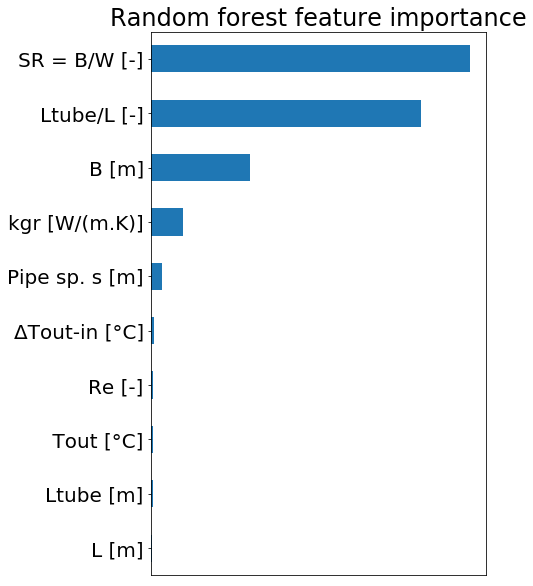

In [66]:
# Variable importances
df_ = pd.DataFrame(X_train.columns, columns = ['feature'])
df_['fscore'] = Model.feature_importances_[:, ]
# Plot the relative importance of the top 10 features
df_['fscore'] = df_['fscore'] / df_['fscore'].max()
df_.sort_values('fscore', ascending = False, inplace = True)
df_ = df_[0:10]
df_.sort_values('fscore', ascending = True, inplace = True)
df_.plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(6, 10))
plt.title('Random forest feature importance', fontsize = 24)
plt.xlabel('')
plt.ylabel('')
plt.xticks([], [])
plt.yticks(fontsize=20)
plt.show()
#plt.gcf().savefig('feature_importance_xgb.png')